In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file = "/content/gdrive/MyDrive/Wavy-Dataset1.xlsx"
DF = pd.read_excel(file, sheet_name='Sheet1')  # Data is of type 'Dataframe'
num_samples = DF.shape[0]
le = DF['le'].tolist()    # The strings are defined in the excel sheet
WF = DF['WF'].tolist()
AR = DF['AR'].tolist()
TR = DF['TR'].tolist()
Vf = DF['Vf'].tolist()
r1 = DF['r1'].tolist()
Rp = DF['Rp'].tolist()
Rvi = DF['Rvi'].tolist()
Rhi = DF['Rhi'].tolist()
CompAvgStr = DF['CompAvgStress'].tolist()
CompStrength = DF['CompStrength'].tolist()

In [ ]:
# Classification into good and bad designs based on the stress ratios
Good_Design = [[le[i], WF[i], AR[i], TR[i], Vf[i], r1[i], Rp[i], Rvi[i], Rhi[i], CompAvgStr[i], CompStrength[i]] for i in range(num_samples) if max(Rp[i], Rvi[i], Rhi[i])==Rvi[i]]
Bad_Design = [[le[i], WF[i], AR[i], TR[i], Vf[i], r1[i], Rp[i], Rvi[i], Rhi[i], CompAvgStr[i], CompStrength[i]] for i in range(num_samples) if max(Rp[i], Rvi[i], Rhi[i])!=Rvi[i]]

le_g, WF_g, AR_g, TR_g, Vf_g, r1_g, Rp_g, Rvi_g, Rhi_g, CompAvgStr_g, CompStrength_g = zip(*Good_Design)
le_b, WF_b, AR_b, TR_b, Vf_b, r1_b, Rp_b, Rvi_b, Rhi_b, CompAvgStr_b, CompStrength_b = zip(*Bad_Design)

In [ ]:
# Creating Dataframes for Good and Bad designs for Regression analysis
nd_var = {'le':le, 'WF':WF, 'AR':AR, 'TR':TR, 'Vf':Vf, 'r1':r1}  # No distinction
nd_out = {'Strength':CompStrength}

gd_var = {'le':le_g, 'WF':WF_g, 'AR':AR_g, 'TR':TR_g, 'Vf':Vf_g, 'r1':r1_g}    # Good Design
gd_out = {'Strength':CompStrength_g}

bd_var = {'le':le_b, 'WF':WF_b, 'AR':AR_b, 'TR':TR_b, 'Vf':Vf_b, 'r1':r1_b}    # Bad Design
bd_out = {'Strength':CompStrength_b}

ND_var_DF = pd.DataFrame(nd_var)
ND_out_DF = pd.DataFrame(nd_out)

GD_var_DF = pd.DataFrame(gd_var)
GD_out_DF = pd.DataFrame(gd_out)

BD_var_DF = pd.DataFrame(bd_var)
BD_out_DF = pd.DataFrame(bd_out)

<ipython-input-6-4ab028be9249>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


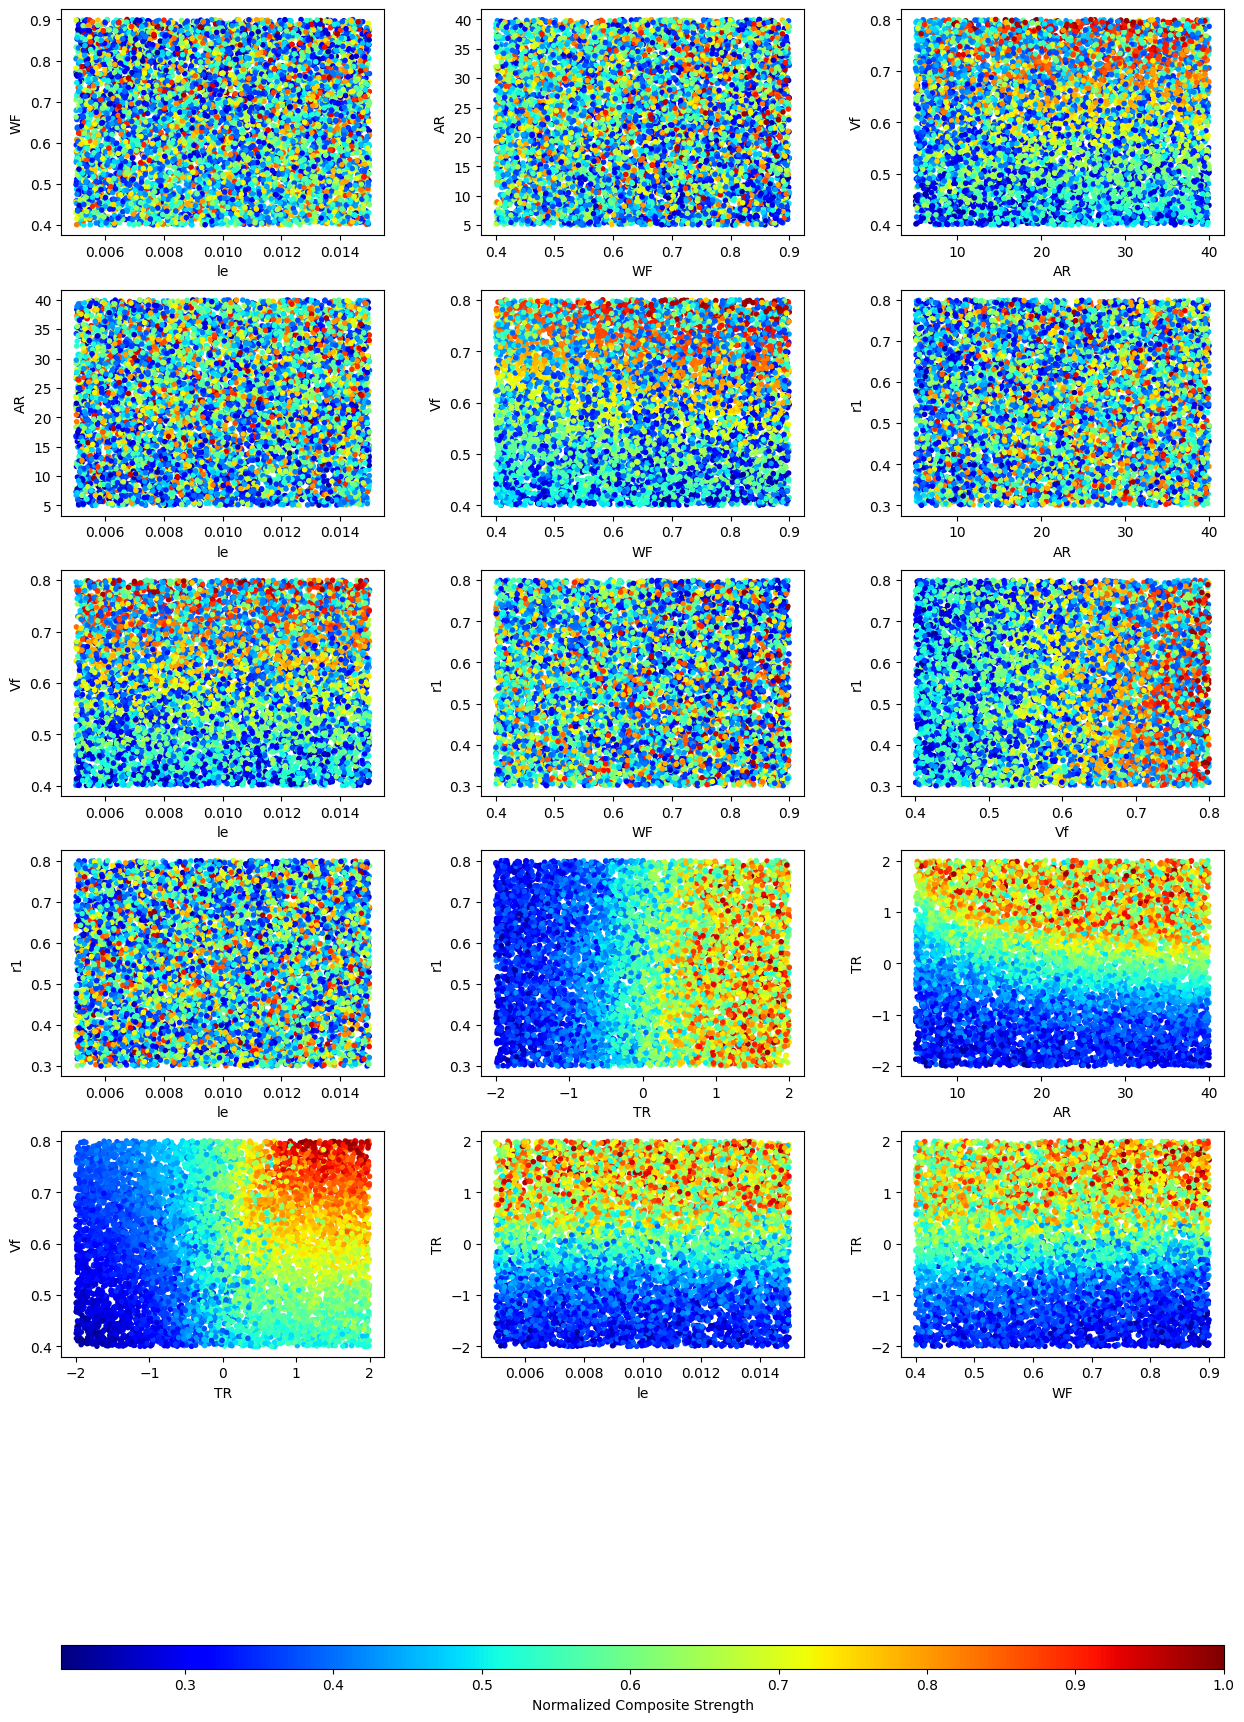

In [ ]:
# FIGURE-1
params = [('le', 'WF'), ('le', 'AR'), ('le', 'Vf'), ('le', 'r1'), ('TR', 'Vf'),
          ('WF', 'AR'), ('WF', 'Vf'), ('WF', 'r1'), ('TR', 'r1'), ('le', 'TR'),
          ('AR', 'Vf'), ('AR', 'r1'), ('Vf', 'r1'),
          ('AR', 'TR'), ('WF', 'TR')
          ]


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
fig.subplots_adjust(hspace=0.24, wspace=0.3)

minval = ND_out_DF['Strength'].min()
maxval = ND_out_DF['Strength'].max()
cmap = plt.cm.get_cmap('jet')

for i, param in enumerate(params):
    ax = axes[i%5, i//5]
    ax.scatter(ND_var_DF[param[0]], ND_var_DF[param[1]], c=ND_out_DF['Strength']/maxval, cmap=cmap, marker='.')
    ax.set_xlabel('{}'.format(param[0]))
    ax.set_ylabel('{}'.format(param[1]))

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(ND_out_DF['Strength']/maxval)
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', aspect=50)
cbar.ax.set_xlabel('Normalized Composite Strength')
plt.show()

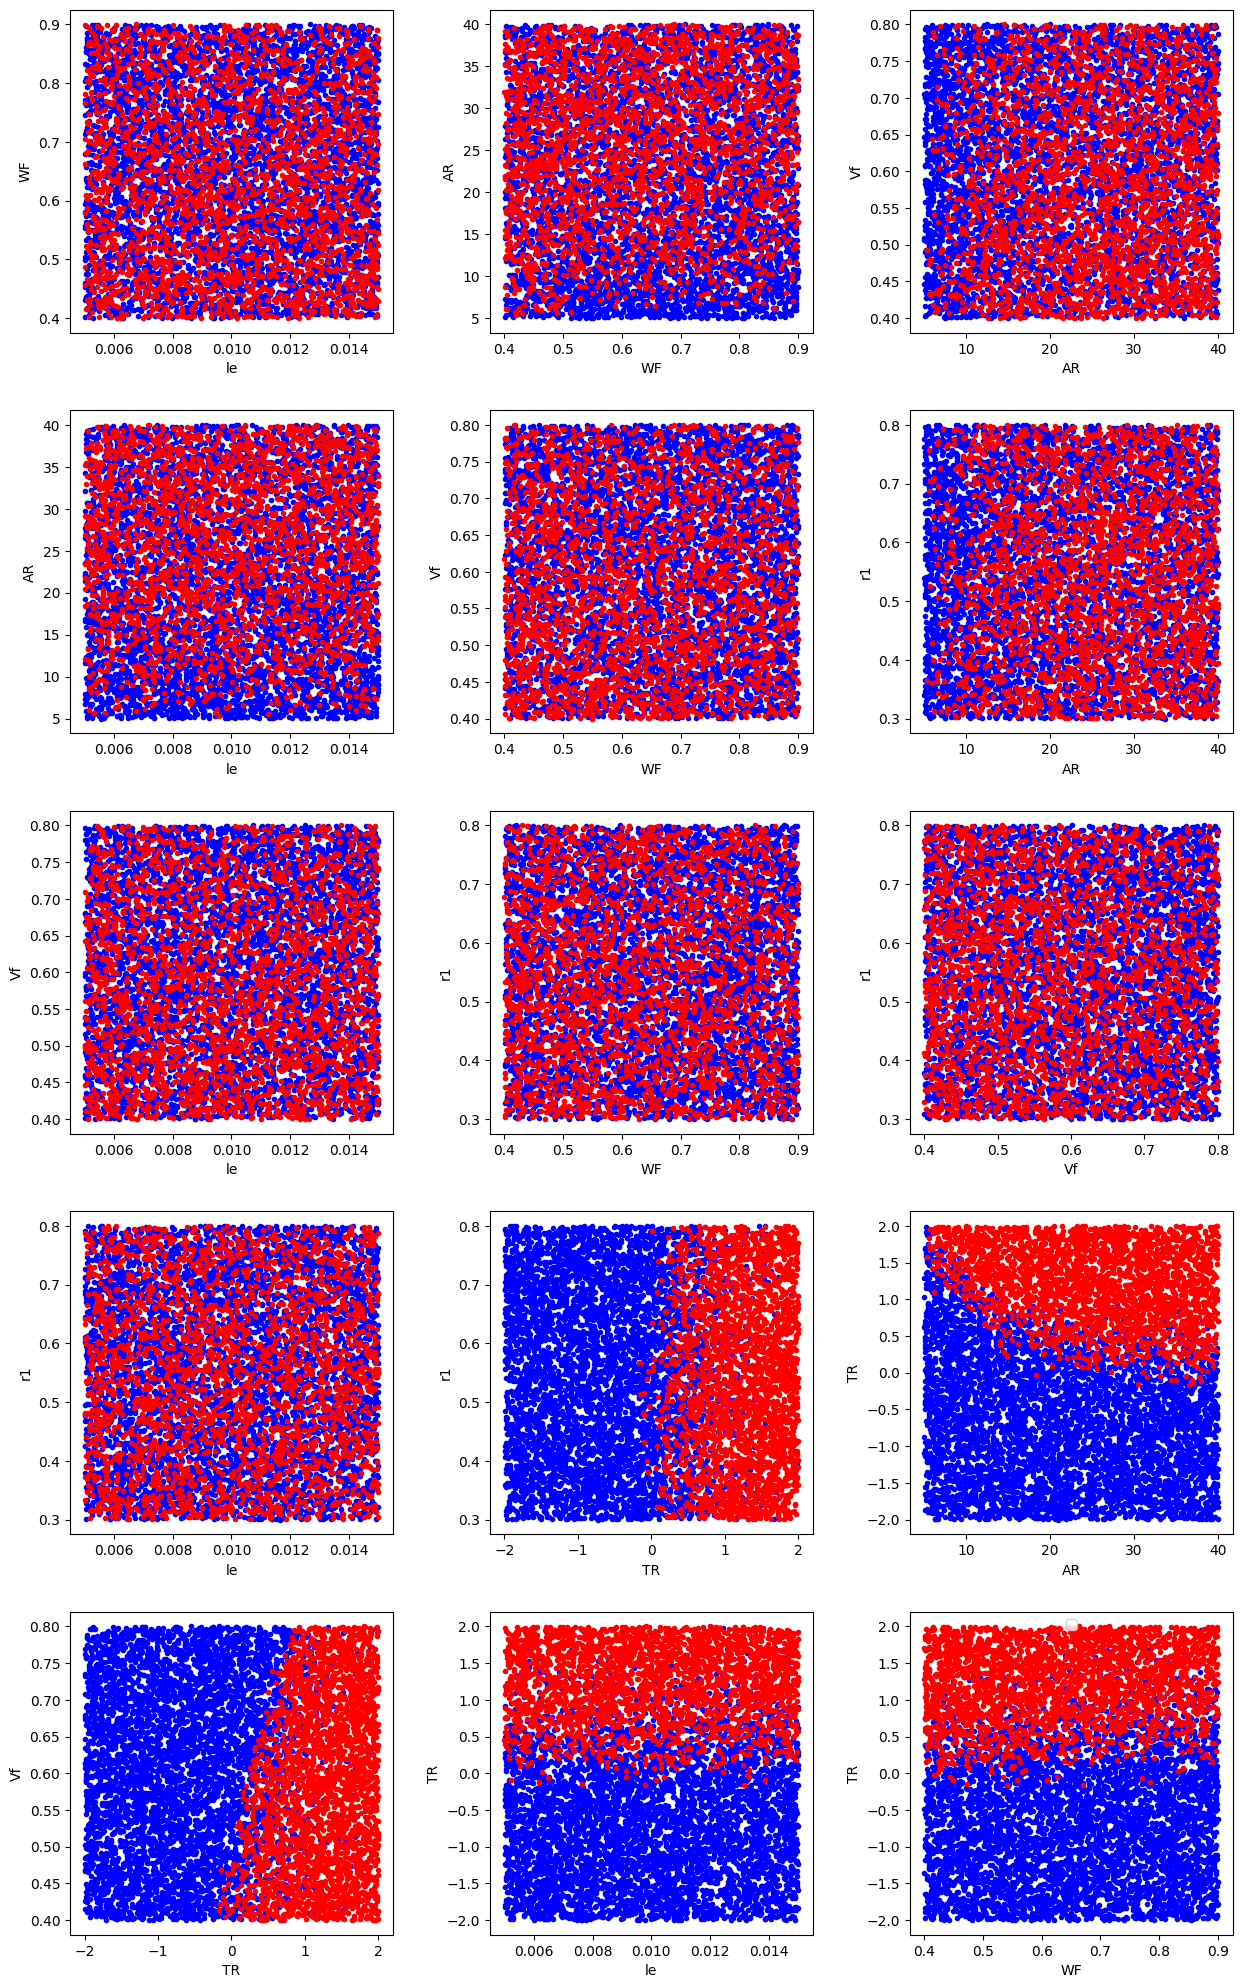

In [ ]:
# FIGURE-2
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
fig.subplots_adjust(hspace=0.24, wspace=0.3)

for i, param in enumerate(params):
    ax = axes[i%5, i//5]
    ax.scatter(GD_var_DF[param[0]], GD_var_DF[param[1]], color='blue', marker='.')
    ax.scatter(BD_var_DF[param[0]], BD_var_DF[param[1]], color='red', marker='.')
    ax.set_xlabel('{}'.format(param[0]))
    ax.set_ylabel('{}'.format(param[1]))
    handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center')
plt.show()

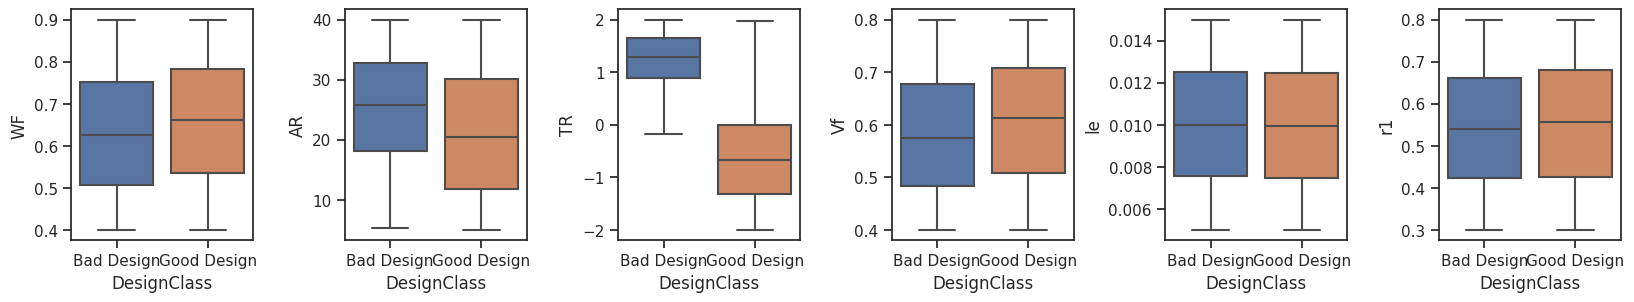

In [ ]:
# FIGURE-3
Design = []
for i in range(len(le)):
    if max(Rvi[i], Rp[i], Rhi[i])==Rvi[i]:
        Design.append('Good Design')
    else:
        Design.append('Bad Design')

DF['DesignClass'] = Design


design_parameters = ['WF', 'AR', 'TR', 'Vf', 'le', 'r1']
sns.set(style="ticks")
fig, axs = plt.subplots(ncols=6, figsize=(20, 3))
fig.subplots_adjust(hspace=0.2, wspace=0.5)
for i, parameter in enumerate(design_parameters):
    sns.boxplot(x='DesignClass', y=parameter, data=DF, ax=axs[i])
plt.show()



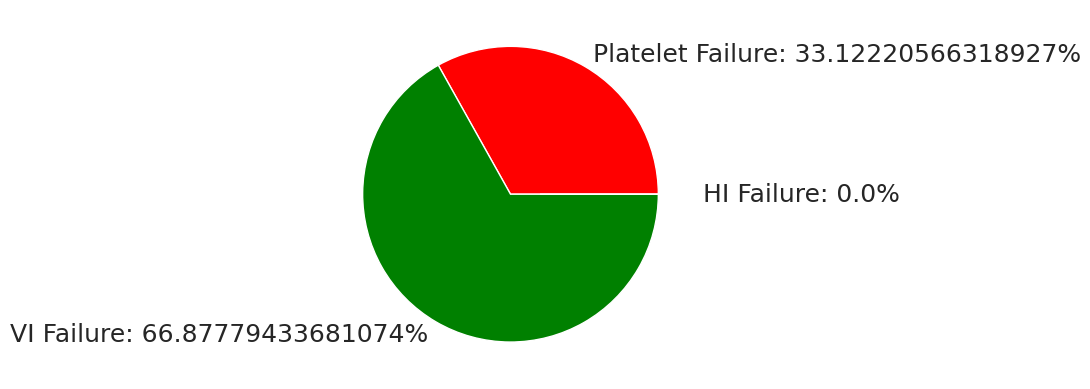

In [ ]:
# FIGURE-4
Failure = []
plt_counter = 0
vi_counter = 0
hi_counter = 0
for i in range(len(le)):
    if max(Rp[i], Rvi[i], Rhi[i])==Rp[i]:
        Failure.append('Platelet Failure')
        plt_counter += 1
    elif max(Rp[i], Rvi[i], Rhi[i])==Rvi[i]:
        Failure.append('VI Failure')
        vi_counter += 1
    else:
        Failure.append('HI Failure')
        hi_counter += 1

DF['FailureMode']:Failure
total_count = plt_counter + vi_counter + hi_counter
percentages = np.array([100*plt_counter/total_count, 100*vi_counter/total_count, 100*hi_counter/total_count])
labels = ['Platelet Failure: '+str(100*plt_counter/total_count)+'%', 'VI Failure: '+str(100*vi_counter/total_count)+'%', 'HI Failure: '+str(100*hi_counter/total_count)+'%']
c = ['red', 'green', 'blue']
explode = [0, 0, 0.2]
plt.pie(percentages, labels=labels, colors=c, shadow=False, explode=explode, textprops={'fontsize':18})
plt.show()